In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
customer_booking=pd.read_csv("customer_booking.csv",encoding="ISO-8859-1")

In [3]:
customer_booking[:10]

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
5,1,Internet,RoundTrip,3,48,20,Thu,AKLDEL,New Zealand,1,0,1,5.52,0
6,3,Internet,RoundTrip,201,33,6,Thu,AKLDEL,New Zealand,1,0,1,5.52,0
7,2,Internet,RoundTrip,238,19,14,Mon,AKLDEL,India,1,0,1,5.52,0
8,1,Internet,RoundTrip,80,22,4,Mon,AKLDEL,New Zealand,0,0,1,5.52,0
9,1,Mobile,RoundTrip,378,30,12,Sun,AKLDEL,India,0,0,0,5.52,0


In [4]:
customer_booking.dtypes

num_passengers             int64
sales_channel             object
trip_type                 object
purchase_lead              int64
length_of_stay             int64
flight_hour                int64
flight_day                object
route                     object
booking_origin            object
wants_extra_baggage        int64
wants_preferred_seat       int64
wants_in_flight_meals      int64
flight_duration          float64
booking_complete           int64
dtype: object

In [5]:
customer_booking.describe().T


,count,mean,std,min,25%,50%,75%,max
num_passengers,50000.0,1.591240,1.020165,1.00,1.00,1.00,2.00,9.0
purchase_lead,50000.0,84.940480,90.451378,0.00,21.00,51.00,115.00,867.0
length_of_stay,50000.0,23.044560,33.887670,0.00,5.00,17.00,28.00,778.0
flight_hour,50000.0,9.066340,5.412660,0.00,5.00,9.00,13.00,23.0
wants_extra_baggage,50000.0,0.668780,0.470657,0.00,0.00,1.00,1.00,1.0
wants_preferred_seat,50000.0,0.296960,0.456923,0.00,0.00,0.00,1.00,1.0
wants_in_flight_meals,50000.0,0.427140,0.494668,0.00,0.00,0.00,1.00,1.0
flight_duration,50000.0,7.277561,1.496863,4.67,5.62,7.57,8.83,9.5
booking_complete,50000.0,0.149560,0.356643,0.00,0.00,0.00,0.00,1.0


In [6]:
customer_booking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

# Converting flight days to numeric ---> Mon-1,Tue-2

In [7]:
customer_booking["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [8]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

customer_booking["flight_day"] = customer_booking["flight_day"].map(mapping)

# Converting trip_type to numeric numbers --> RoundTrip-1,OneWay-2

In [9]:
customer_booking["trip_type"].unique()

array(['RoundTrip', 'CircleTrip', 'OneWay'], dtype=object)

In [10]:


mapping={
    'RoundTrip':1,
    'CircleTrip':2,
    'OneWay':3,
}

customer_booking["trip_type"]=customer_booking["trip_type"].map(mapping)

# Converting sales_channels to numeric form

In [11]:
customer_booking["sales_channel"].unique()

array(['Internet', 'Mobile'], dtype=object)

In [12]:
mapping={
    'Internet':1,
    'Mobile':2,
}

customer_booking["sales_channel"]=customer_booking["sales_channel"].map(mapping)

In [13]:

# Create a dictionary to map unique strings to numerical values (starting from 0)
booking_mapping = dict(zip(customer_booking["booking_origin"].unique(), range(len(customer_booking["booking_origin"].unique()))))

# Convert the strings in the array to numerical values using the dictionary
customer_booking["booking_origin"] = customer_booking["booking_origin"].apply(lambda x: booking_mapping[x])

In [14]:

num_unique_items = customer_booking["route"].nunique()
print("Number of unique items:", num_unique_items)


Number of unique items: 799


In [15]:
# Create a dictionary to map unique strings to numerical values (starting from 0)
route_mapping = dict(zip(customer_booking["route"].unique(), range(len(customer_booking["route"].unique()))))

# Convert the strings in the array to numerical values using the dictionary
customer_booking["route"] = customer_booking["route"].apply(lambda x: route_mapping[x])


In [16]:
customer_booking["route"]

0          0
1          0
2          0
3          0
4          0
        ... 
49995    638
49996    638
49997    638
49998    638
49999    638
Name: route, Length: 50000, dtype: int64

# Updated dataset

In [17]:

len(customer_booking)

50000

# Splitting the dataset into features and labels

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
purchase_lead_scaled=scaler.fit_transform(customer_booking[["purchase_lead"]])

In [19]:
purchase_lead_scaled

array([[0.30219146],
       [0.12918108],
       [0.28027682],
       ...,
       [0.02768166],
       [0.01730104],
       [0.02191465]])

In [20]:
customer_booking["purchase_lead"]=np.array(purchase_lead_scaled).flatten()

In [21]:
scaler=MinMaxScaler()
length_of_stay_scaled=scaler.fit_transform(customer_booking[["length_of_stay"]])

In [22]:
customer_booking["length_of_stay"]=np.array(length_of_stay_scaled)

In [23]:
scaler=MinMaxScaler()
flight_hour_scaled=scaler.fit_transform(customer_booking[["flight_hour"]])

In [24]:
customer_booking["flight_hour"]=np.array(flight_hour_scaled)

In [25]:
customer_booking

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,1,1,0.302191,0.024422,0.304348,6,0,0,1,0,0,5.52,0
1,1,1,1,0.129181,0.025707,0.130435,6,0,0,0,0,0,5.52,0
2,2,1,1,0.280277,0.028278,0.739130,3,0,1,1,1,0,5.52,0
3,1,1,1,0.110727,0.039846,0.173913,6,0,0,0,0,1,5.52,0
4,2,1,1,0.078431,0.028278,0.652174,3,0,1,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,1,1,0.031142,0.007712,0.391304,6,638,36,1,0,1,5.62,0
49996,1,1,1,0.128028,0.007712,0.173913,7,638,36,0,0,0,5.62,0
49997,1,1,1,0.027682,0.007712,0.956522,6,638,36,0,0,1,5.62,0
49998,1,1,1,0.017301,0.007712,0.478261,1,638,36,1,0,1,5.62,0


In [26]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

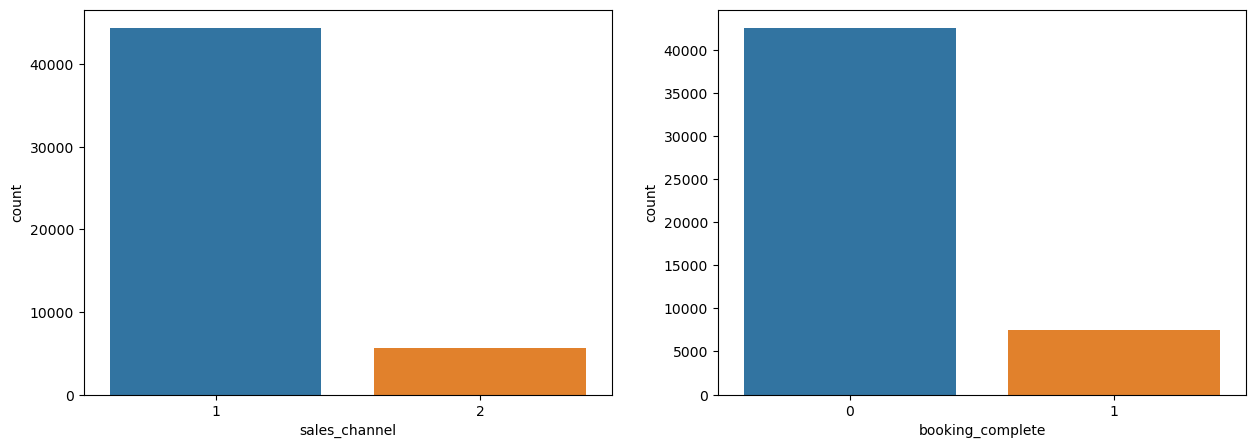

In [27]:
import seaborn as sns
fig,ax=plt.subplots(1,2, figsize=(15,5))
sns.countplot(data=customer_booking, x="sales_channel", ax=ax[0]);
sns.countplot(data=customer_booking, x="booking_complete", ax=ax[1]);

## Customer is booking more flights over the internet but the completion rate is very low


<Axes: xlabel='wants_preferred_seat', ylabel='count'>

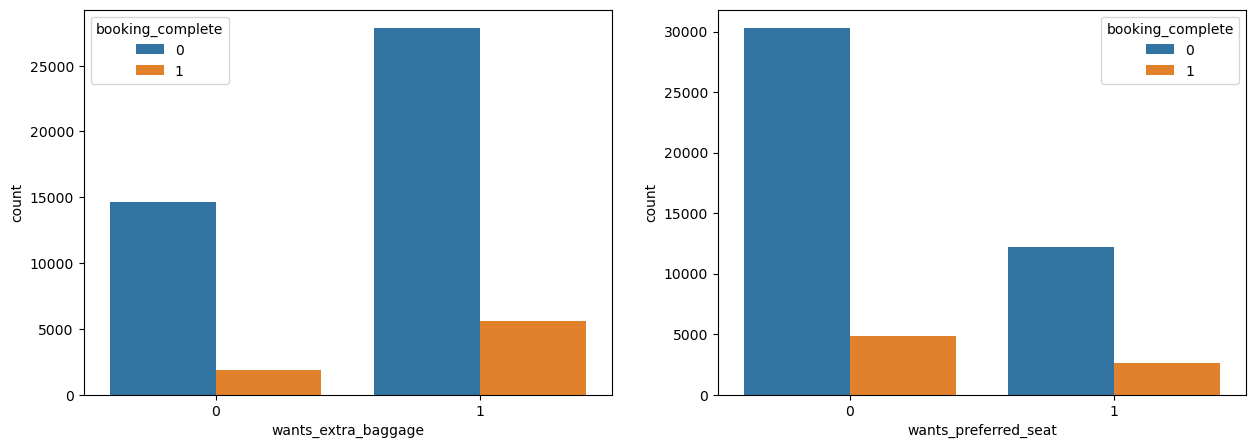

In [28]:
import seaborn as sns
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot(data=customer_booking, x="wants_extra_baggage",hue="booking_complete",ax=ax[0])
sns.countplot(data=customer_booking, hue="booking_complete",x="wants_preferred_seat", ax=ax[1])

<Axes: xlabel='flight_day', ylabel='count'>

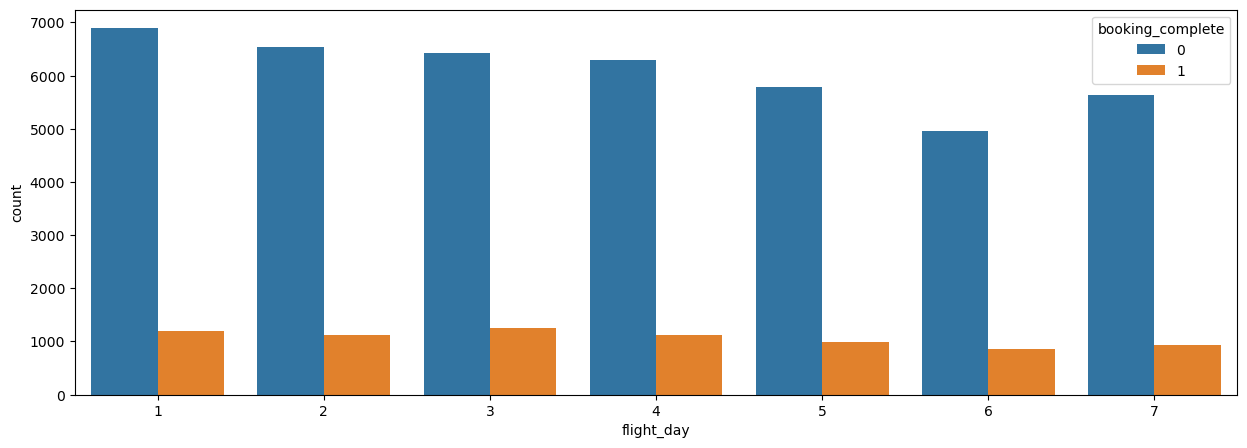

In [29]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(15, 5))
sns.countplot(data=customer_booking, x="flight_day",hue="booking_complete")

## If customer wants extra_luggage he is more likely to book the flight , in the case of preferred seat it preference does plays the role but customer who has no preference is booking more

<Axes: xlabel='wants_in_flight_meals', ylabel='count'>

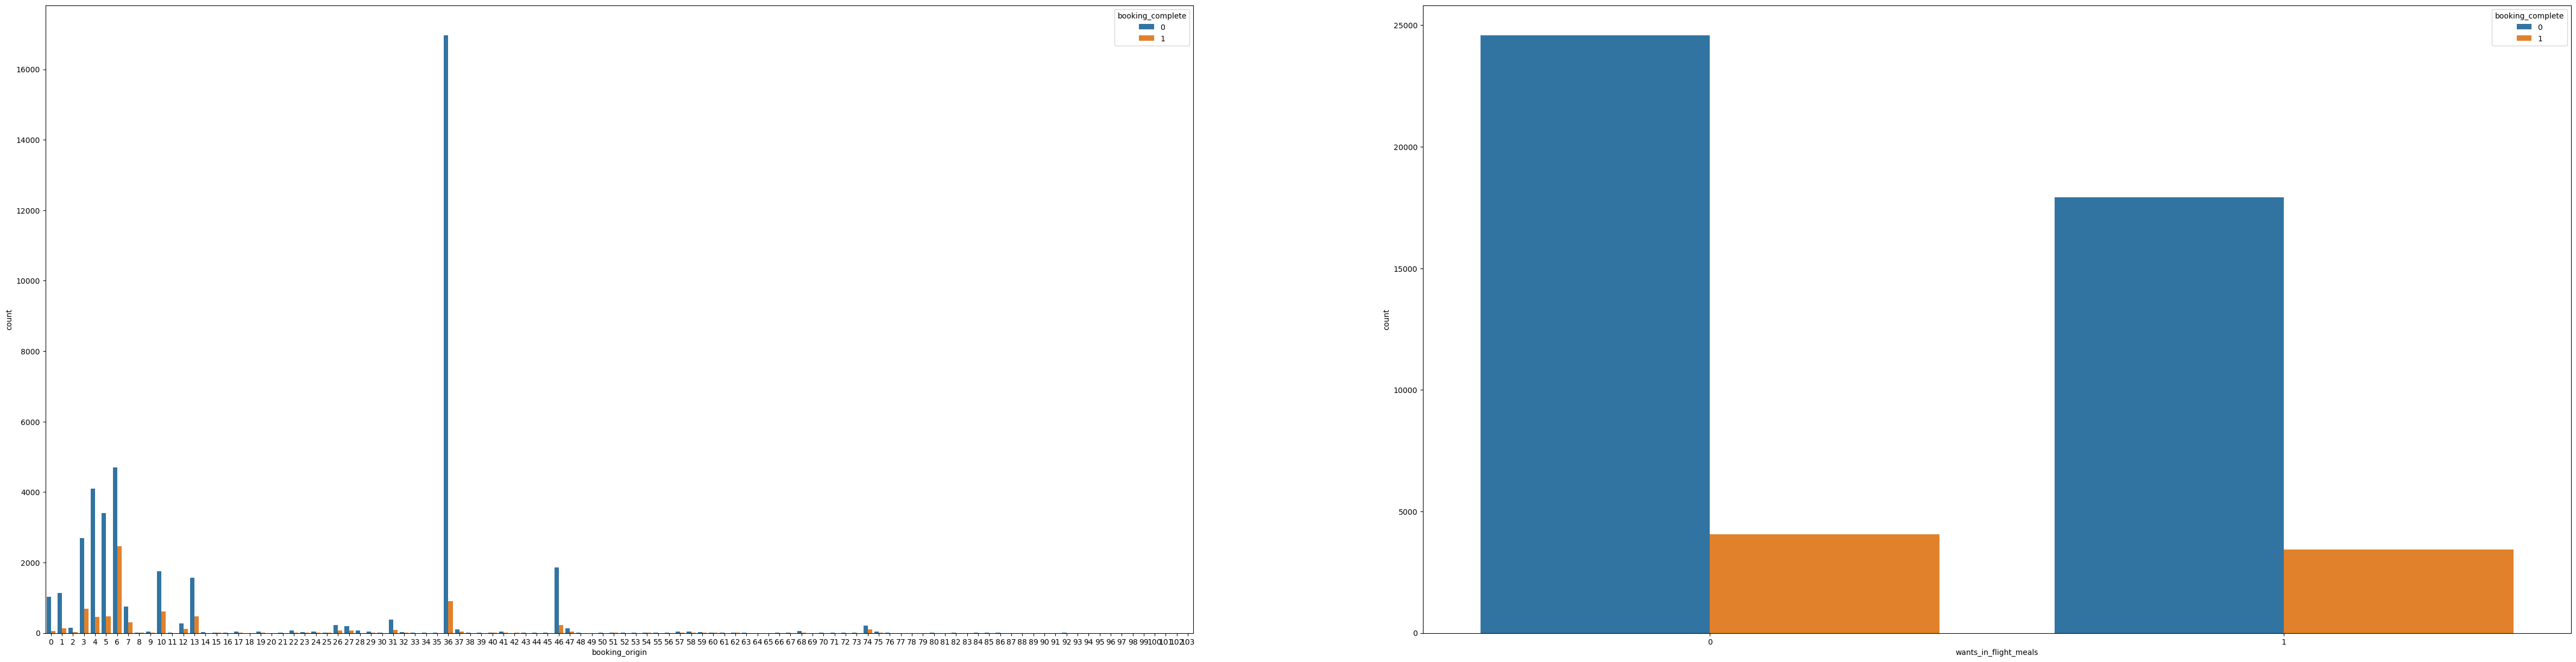

In [30]:
import seaborn as sns
fig, ax = plt.subplots(1, 2, figsize=(60, 15))
sns.countplot(data=customer_booking, x="booking_origin",hue="booking_complete",ax=ax[0])
sns.countplot(data=customer_booking, hue="booking_complete",x="wants_in_flight_meals", ax=ax[1])

# Customers from japan are booking more flights and customers from australia are not booking more, customers in australia want more baggage but are booking less

<Axes: xlabel='route', ylabel='count'>

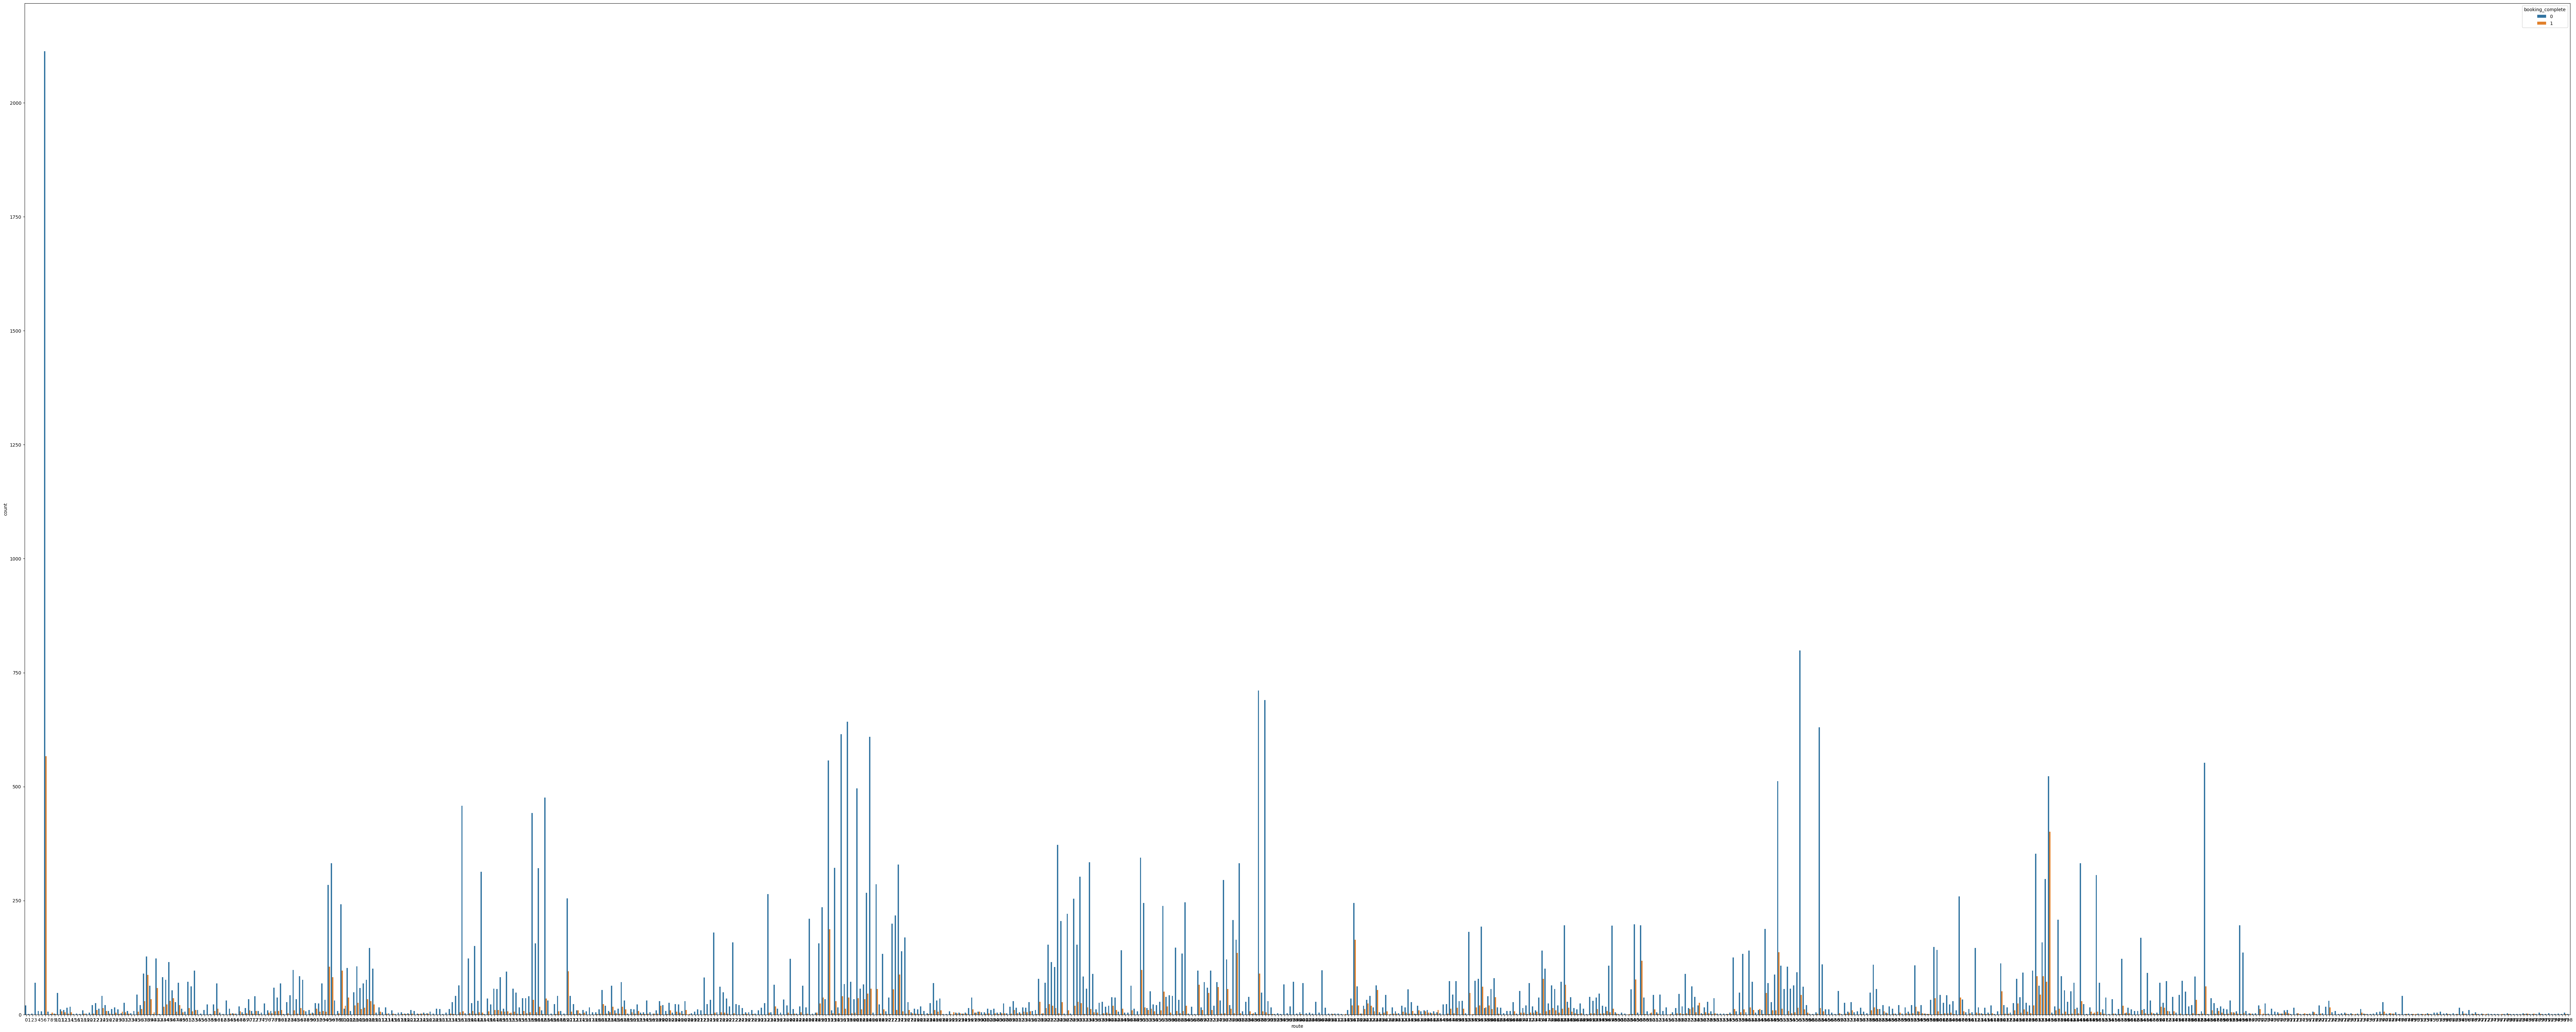

In [31]:
import seaborn as sns
fig,ax=plt.subplots(figsize=(100,40))
sns.countplot(data=customer_booking,x="route",hue="booking_complete")




In [32]:
customer_booking

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,1,1,0.302191,0.024422,0.304348,6,0,0,1,0,0,5.52,0
1,1,1,1,0.129181,0.025707,0.130435,6,0,0,0,0,0,5.52,0
2,2,1,1,0.280277,0.028278,0.739130,3,0,1,1,1,0,5.52,0
3,1,1,1,0.110727,0.039846,0.173913,6,0,0,0,0,1,5.52,0
4,2,1,1,0.078431,0.028278,0.652174,3,0,1,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,1,1,0.031142,0.007712,0.391304,6,638,36,1,0,1,5.62,0
49996,1,1,1,0.128028,0.007712,0.173913,7,638,36,0,0,0,5.62,0
49997,1,1,1,0.027682,0.007712,0.956522,6,638,36,0,0,1,5.62,0
49998,1,1,1,0.017301,0.007712,0.478261,1,638,36,1,0,1,5.62,0


In [33]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score


In [34]:
x=customer_booking.drop("booking_complete",axis=1)
y=customer_booking["booking_complete"]

In [94]:
from sklearn.model_selection import train_test_split
np.random.seed(42)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [97]:
model=RandomForestClassifier(n_estimators=200)
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.8568

In [98]:
y_predicted=model.predict(x_test)
y_predicted

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [99]:
model.feature_importances_

array([0.04854   , 0.01117128, 0.00164316, 0.19345091, 0.12663275,
       0.14083327, 0.09074526, 0.14998615, 0.11019696, 0.0152846 ,
       0.0158827 , 0.02302774, 0.0726052 ])

In [100]:
y_pred=pd.DataFrame(y_predicted)
y_pred

,0
0,0
1,0
2,0
3,0
4,0
...,...
9995,0
9996,0
9997,0
9998,0


In [101]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predicted)
cm

array([[8401,  119],
       [1313,  167]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

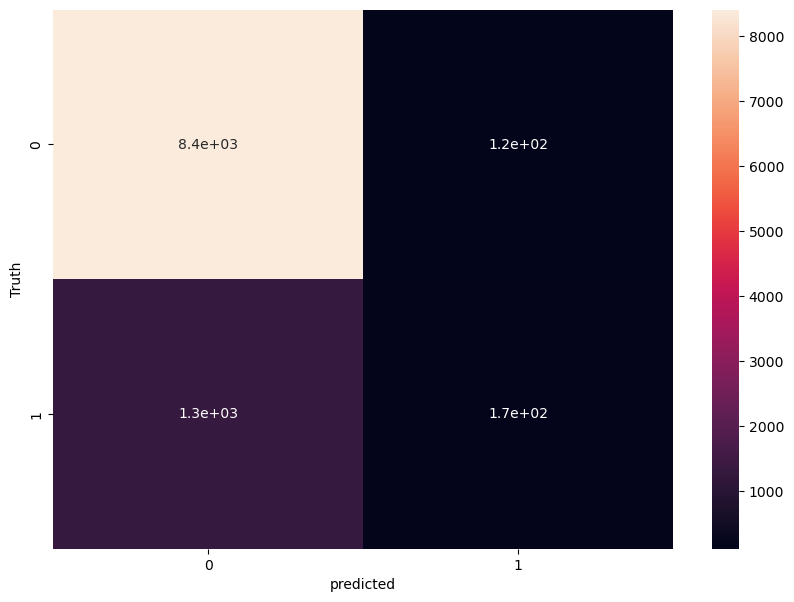

In [102]:
%matplotlib inline
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel("predicted")
plt.ylabel("Truth")

In [103]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8568

In [104]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, x_train, y_train, cv=3)


array([0.85023249, 0.8518713 , 0.85082127])

In [105]:
from sklearn.metrics import classification_report
report=classification_report(y_pred,y_test)
report

'              precision    recall  f1-score   support\n\n           0       0.99      0.86      0.92      9714\n           1       0.11      0.58      0.19       286\n\n    accuracy                           0.86     10000\n   macro avg       0.55      0.72      0.56     10000\nweighted avg       0.96      0.86      0.90     10000\n'

In [106]:
import pandas as pd

# Assuming 'report' contains the classification report
report_dict = classification_report(y_pred, y_test, output_dict=True)
df = pd.DataFrame(report_dict).transpose()


In [107]:
df

,precision,recall,f1-score,support
0,0.986033,0.864834,0.921465,9714.0000
1,0.112838,0.583916,0.189128,286.0000
accuracy,0.856800,0.856800,0.856800,0.8568
macro avg,0.549435,0.724375,0.555297,10000.0000
weighted avg,0.961059,0.856800,0.900521,10000.0000


<function matplotlib.pyplot.show(close=None, block=None)>

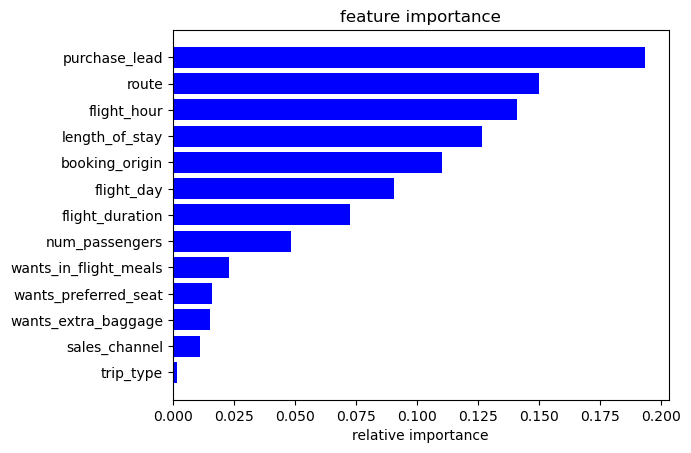

In [108]:
features=customer_booking.columns
importances=model.feature_importances_
indices=np.argsort(importances)

plt.title("feature importance")
plt.barh(range(len(indices)),importances[indices],color='b',align='center')
plt.yticks(range(len(indices)),[features[i]for i in indices])
plt.xlabel("relative importance")
plt.show
